In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
readIn = pd.read_csv("df.csv")
df = pd.DataFrame(readIn)


In [3]:
readIn = pd.read_csv("data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [4]:
# print(df.shape)

# index_to_keep = df['BORROWER_ID'].isin(df_target['BORROWER_ID'])

# df = df[index_to_keep]

# print(df.shape)

In [5]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,-1.00,479a2e13,-1.0,...,1.00,-1.0,1241.0,98.0,98.0,20.0,A,-1.0,-,NaN
1,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
2,2NLT774,MMkJ8z/e,1d42bbf5,-1.0,0.0,31,2457038,-1.00,479a2e13,-1.0,...,0.99,-1.0,1221.0,98.0,98.0,-1.0,A,-1.0,-,NaN
3,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,-1.00,479a2e13,-1.0,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
4,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,-1.00,479a2e13,-1.0,...,0.98,-1.0,1204.0,98.0,98.0,-1.0,A,-1.0,-,NaN
5,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,-1.00,479a2e13,-1.0,...,1.03,-1.0,1255.0,98.0,98.0,4.0,A,-1.0,-,NaN
6,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,-1.00,479a2e13,-1.0,...,1.04,-1.0,1234.0,98.0,98.0,-1.0,A,-1.0,-,NaN
7,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,-1.00,479a2e13,-1.0,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,-1.0,-,NaN
8,siZsAv94,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,-1.00,479a2e13,-1.0,...,1.01,-1.0,1211.0,98.0,98.0,120.0,A,-1.0,-,NaN
9,Cau-hmu+,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,...,1.01,100001.0,1238.0,98.0,98.0,29.0,A,-1.0,-,NaN


In [6]:
len(df)

1558442

In [7]:
# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_INTERMEDIARY',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_DEPT_SERVICE_TO_INCOME',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_INCOME',
#     'CONTRACT_INSTALMENT_AMOUNT',
#     'CONTRACT_INSTALMENT_AMOUNT_2',
#     'CONTRACT_INTEREST_PERIOD',
#     'CONTRACT_INTEREST_RATE',
#     'CONTRACT_LGD',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TO_VALUE_RATIO',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MARKET_VALUE',
#     'CONTRACT_MATURITY_DATE',
#     'CONTRACT_MORTGAGE_LENDING_VALUE',
#     'CONTRACT_MORTGAGE_TYPE',
#     'CONTRACT_REFINANCED',
#     'CONTRACT_RISK_WEIGHTED_ASSETS',
#     'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
#     'BORROWER_BIRTH_YEAR',
#     'BORROWER_CITIZENSHIP',
#     'BORROWER_COUNTRY',
#     'BORROWER_COUNTY',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'BORROWER_TYPE_OF_SETTLEMENT',
#     'TARGET_EVENT',
#     'TARGET_EVENT_DAY'
# ]

# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MATURITY_DATE',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'TARGET_EVENT'
# ]

In [8]:
# df=df[coloumns]

# Data preparation

In [9]:
def dummy_creator(df, column):

  ps_dummies = pd.get_dummies(df[column], prefix = column +'=', drop_first = True)

  df = df.merge(ps_dummies, left_index = True, right_index = True, how = 'left')

  return df

## Coloumns

In [10]:
df = df.drop('CONTRACT_ID', axis=1)

In [6]:
def calculate_mode(x):
    return x.value_counts().idxmax()

### BORROWER_BIRTH_YEAR

In [11]:
print(df['BORROWER_BIRTH_YEAR'].min ())
print(df['BORROWER_BIRTH_YEAR'].max())

1188.0
1287.0


In [12]:
df['B_BIRTH_CATEGORY']=((df['BORROWER_BIRTH_YEAR']-df['BORROWER_BIRTH_YEAR'].min())/10).astype(int)

In [13]:
df.head(10)

,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,...,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY,B_BIRTH_CATEGORY
0,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,-1.00,479a2e13,-1.0,9545.0,...,-1.0,1241.0,98.0,98.0,20.0,A,-1.0,-,NaN,5
1,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,8899.0,...,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN,1
2,MMkJ8z/e,1d42bbf5,-1.0,0.0,31,2457038,-1.00,479a2e13,-1.0,14329.0,...,-1.0,1221.0,98.0,98.0,-1.0,A,-1.0,-,NaN,3
3,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,-1.00,479a2e13,-1.0,4003.0,...,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN,7
4,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,-1.00,479a2e13,-1.0,11214.0,...,-1.0,1204.0,98.0,98.0,-1.0,A,-1.0,-,NaN,1
5,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,-1.00,479a2e13,-1.0,11405.0,...,-1.0,1255.0,98.0,98.0,4.0,A,-1.0,-,NaN,6
6,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,-1.00,479a2e13,-1.0,6045.0,...,-1.0,1234.0,98.0,98.0,-1.0,A,-1.0,-,NaN,4
7,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,-1.00,479a2e13,-1.0,10431.0,...,0.0,1228.0,98.0,98.0,3.0,A,-1.0,-,NaN,4
8,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,-1.00,479a2e13,-1.0,14638.0,...,-1.0,1211.0,98.0,98.0,120.0,A,-1.0,-,NaN,2
9,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,11677.0,...,100001.0,1238.0,98.0,98.0,29.0,A,-1.0,-,NaN,5


In [14]:
df = df.drop('BORROWER_BIRTH_YEAR', axis=1)

### BORROWER_CITIZENSHIP

In [15]:
len(df['BORROWER_CITIZENSHIP'].value_counts())

40

In [16]:
df=dummy_creator(df,'BORROWER_CITIZENSHIP')

In [17]:
df=df.drop('BORROWER_CITIZENSHIP', axis=1)

### BORROWER_COUNTRY

In [18]:
df=df.drop('BORROWER_COUNTRY', axis=1)

### BORROWER_COUNTY

In [19]:
df=dummy_creator(df,'BORROWER_COUNTY')

In [20]:
df=df.drop('BORROWER_COUNTY', axis=1)

In [21]:
df.head(10)

,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,...,BORROWER_COUNTY=_189.0,BORROWER_COUNTY=_190.0,BORROWER_COUNTY=_191.0,BORROWER_COUNTY=_192.0,BORROWER_COUNTY=_193.0,BORROWER_COUNTY=_194.0,BORROWER_COUNTY=_195.0,BORROWER_COUNTY=_196.0,BORROWER_COUNTY=_197.0,BORROWER_COUNTY=_198.0
0,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,-1.00,479a2e13,-1.0,9545.0,...,False,False,False,False,False,False,False,False,False,False
1,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,8899.0,...,False,False,False,False,False,False,False,False,False,False
2,MMkJ8z/e,1d42bbf5,-1.0,0.0,31,2457038,-1.00,479a2e13,-1.0,14329.0,...,False,False,False,False,False,False,False,False,False,False
3,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,-1.00,479a2e13,-1.0,4003.0,...,False,False,False,False,False,False,False,False,False,False
4,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,-1.00,479a2e13,-1.0,11214.0,...,False,False,False,False,False,False,False,False,False,False
5,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,-1.00,479a2e13,-1.0,11405.0,...,False,False,False,False,False,False,False,False,False,False
6,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,-1.00,479a2e13,-1.0,6045.0,...,False,False,False,False,False,False,False,False,False,False
7,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,-1.00,479a2e13,-1.0,10431.0,...,False,False,False,False,False,False,False,False,False,False
8,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,-1.00,479a2e13,-1.0,14638.0,...,False,False,False,False,False,False,False,False,False,False
9,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,11677.0,...,False,False,False,False,False,False,False,False,False,False


### BORROWER_TYPE_OF_CUSTOMER

In [22]:
df=dummy_creator(df,'BORROWER_TYPE_OF_CUSTOMER')
df=df.drop('BORROWER_TYPE_OF_CUSTOMER', axis=1)

### BORROWER_TYPE_OF_SETTLEMENT

In [23]:
df=dummy_creator(df,'BORROWER_TYPE_OF_SETTLEMENT')
df=df.drop('BORROWER_TYPE_OF_SETTLEMENT', axis=1)

In [ ]:
def datagen_modeA(origdf,startnap, endnap):
    df2 = origdf[ origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[ df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    
    cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    # TARGET VALTOZO KESZITES
    feltetel=(df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+2*365) & (df['TARGET_EVENT']=='K') 
    df['target']=0
    df.loc[feltetel,'target']=1
    
    stat = df.groupby("BORROWER_ID",as_index=False).agg({'target':'max'})
    cust_df=cust_df.merge(stat,on='BORROWER_ID',how='left')
    cust_df['target']=cust_df['target'].fillna(0)  
    

    stat = df.groupby("BORROWER_ID",as_index=False).agg(
        {   'CONTRACT_ID':'count',
            'CONTRACT_BANK_ID': calculate_mode,
            'CONTRACT_CREDIT_INTERMEDIARY': calculate_mode,
            'CONTRACT_CREDIT_LOSS': 'sum',
            'CONTRACT_DEPT_SERVICE_TO_INCOME': 'mean',
            'CONTRACT_INCOME': 'sum',
            'CONTRACT_INSTALMENT_AMOUNT': 'average',
            'CONTRACT_INTEREST_RATE': 'sum',
            'CONTRACT_LGD': 'sum',
            'CONTRACT_LOAN_AMOUNT': 'sum',
            'CONTRACT_LOAN_TO_VALUE_RATIO': 'mean',
            'CONTRACT_MARKET_VALUE': 'sum',
            'CONTRACT_MORTGAGE_LENDING_VALUE': 'sum',
            'BORROWER_BIRTH_YEAR': calculate_mode,
            'BORROWER_CITIZENSHIP': calculate_mode,
            'BORROWER_COUNTRY':calculate_mode ,
            'BORROWER_COUNTY': calculate_mode,
            'BORROWER_TYPE_OF_CUSTOMER': calculate_mode,
            'TARGET_EVENT',
            'TARGET_EVENT_DAY'
        }
)
    
    
    stat.columns=['BORROWER_ID','in_contract_num','in_loan_amount_sum']
    cust_df=cust_df.merge(stat,on='BORROWER_ID',how='left')
    return cust_df

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

### CONTRACT_ID

### BORROWER_ID

In [60]:
stat.head(20)

,BORROWER_ID,CONTRACT_ID,CONTRACT_LOAN_AMOUNT
0,+++b/oYx,1,2873904
1,+++pcjqH,1,462261
2,+++ukYrT,1,123385
3,+++wvYn7,1,221456
4,++/6JzSJ,1,824094
5,++/Ys2ls,2,1595257
6,++/faYdJ,1,187060
7,++/rT+Iv,1,187263
8,++0Mv31Z,1,62791
9,++0yhZwt,1,995622


### CONTRACT_BANK_ID

In [24]:
df=dummy_creator(df,'CONTRACT_BANK_ID')
df=df.drop('CONTRACT_BANK_ID', axis=1)

### CONTRACT_CREDIT_INTERMEDIARY

In [25]:
df=dummy_creator(df,'CONTRACT_CREDIT_INTERMEDIARY')
df=df.drop('CONTRACT_CREDIT_INTERMEDIARY', axis=1)

### CONTRACT_CREDIT_LOSS

????? ez full zavaros

<Axes: >

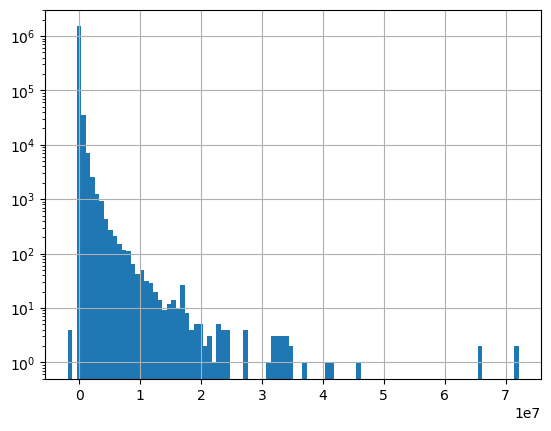

In [26]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)

In [27]:
df=df.drop('CONTRACT_CREDIT_LOSS', axis=1)

### CONTRACT_CURRENCY

In [28]:
df=df.drop('CONTRACT_CURRENCY', axis=1)

### CONTRACT_DATE_OF_LOAN_AGREEMENT

In [29]:
startday=df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()
finalday=df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max()

df['CONTRACT_DATE_OF_LOAN_AGREEMENT']=df['CONTRACT_DATE_OF_LOAN_AGREEMENT']-df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()

### CONTRACT_DEPT_SERVICE_TO_INCOME

<Axes: >

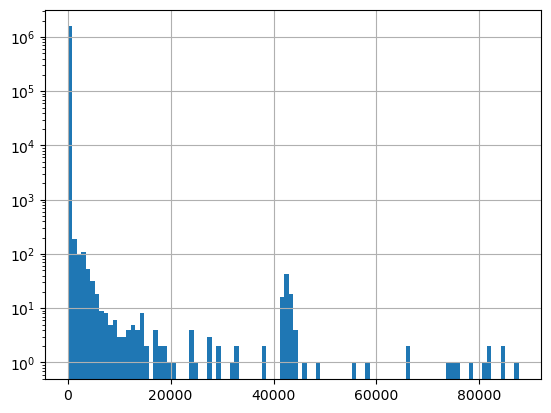

In [30]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].hist(bins=100, log=True)

In [31]:
df=df.drop('CONTRACT_DEPT_SERVICE_TO_INCOME', axis=1)

In [32]:
df.head(10)

,BORROWER_ID,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_LOAN_CONTRACT_TYPE,CONTRACT_LOAN_TO_VALUE_RATIO,...,CONTRACT_BANK_ID=_f70e0b0d,CONTRACT_BANK_ID=_f789f8b0,CONTRACT_BANK_ID=_f97fb4b4,CONTRACT_BANK_ID=_f9acbe19,CONTRACT_BANK_ID=_fa4153a8,CONTRACT_BANK_ID=_fef38341,CONTRACT_CREDIT_INTERMEDIARY=_0.0,CONTRACT_CREDIT_INTERMEDIARY=_1.0,CONTRACT_CREDIT_INTERMEDIARY=_2.0,CONTRACT_CREDIT_INTERMEDIARY=_20001.0
0,d8SqtuEV,28,479a2e13,-1.0,9545.0,22.08,175424.0,192161,1,-1.0,...,False,False,False,False,False,False,False,False,True,False
1,gII7nnq4,19,479a2e13,127305.0,8899.0,22.35,282553.0,275924,2,-1.0,...,False,False,False,False,False,False,False,False,True,False
2,MMkJ8z/e,14,479a2e13,-1.0,14329.0,0.00,68981.0,138862,2,-1.0,...,False,False,False,False,False,False,False,False,False,False
3,M417onFP,67,479a2e13,-1.0,4003.0,23.92,163319.0,169624,1,-1.0,...,False,False,False,False,False,False,False,False,True,False
4,u9GRAuen,69,479a2e13,-1.0,11214.0,35.12,74244.0,100079,2,-1.0,...,False,False,False,False,False,False,False,False,True,False
5,L2Nu2zZe,22,479a2e13,-1.0,11405.0,16.28,118161.0,140975,2,-1.0,...,False,False,False,False,False,False,False,False,True,False
6,5A0GWOi2,25,479a2e13,-1.0,6045.0,16.27,42047.0,60963,2,-1.0,...,False,False,False,False,False,False,False,False,True,False
7,lqPGd2+x,57,479a2e13,-1.0,10431.0,21.66,170739.0,190782,1,-1.0,...,False,False,False,False,False,False,False,False,True,False
8,O7soZ57f,60,479a2e13,-1.0,14638.0,37.40,130944.0,130827,2,-1.0,...,False,False,False,False,False,False,False,False,True,False
9,CnYRm/vc,76,479a2e13,109235.0,11677.0,25.06,271190.0,307046,1,-1.0,...,False,False,False,False,False,False,False,False,True,False


### CONTRACT_FREQUENCY_TYPE

In [33]:
df=dummy_creator(df,'CONTRACT_FREQUENCY_TYPE')
df=df.drop('CONTRACT_FREQUENCY_TYPE', axis=1)

### CONTRACT_INCOME

In [34]:
df['CONTRACT_INCOME']=df['CONTRACT_INCOME'].fillna(-1)

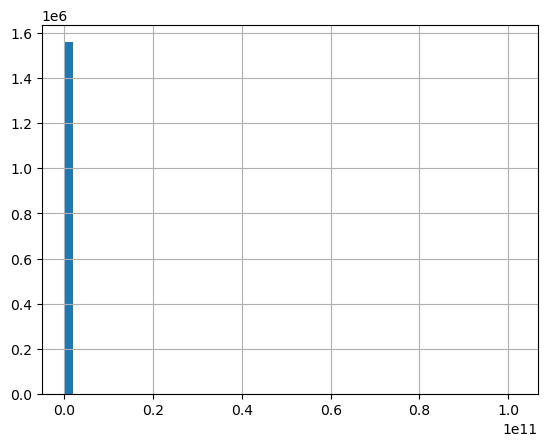

In [35]:
df['CONTRACT_INCOME'].hist(bins=50)
plt.show()

### CONTRACT_INSTALMENT_AMOUNT and _2

### CONTRACT_INTEREST_PERIOD

### CONTRACT_INTEREST_RATE

### CONTRACT_LGD

<Axes: >

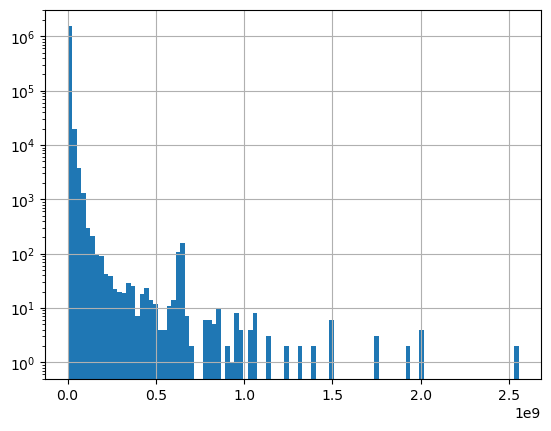

In [36]:
df['CONTRACT_LGD'].hist(bins=100, log=True)

### CONTRACT_LOAN_AMOUNT

### CONTRACT_LOAN_CONTRACT_TYPE

In [37]:
df=dummy_creator(df,'CONTRACT_LOAN_CONTRACT_TYPE')
df=df.drop('CONTRACT_LOAN_CONTRACT_TYPE', axis=1)

### CONTRACT_LOAN_TO_VALUE_RATIO

<Axes: >

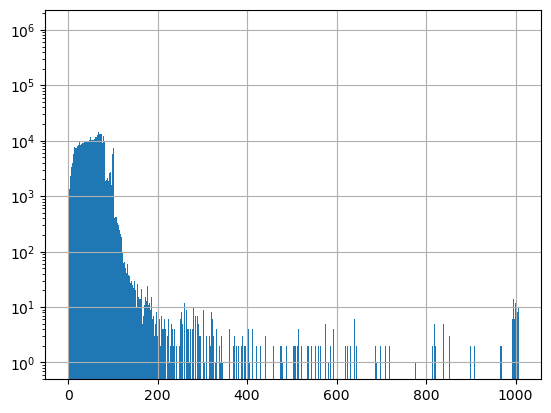

In [38]:
df['CONTRACT_LOAN_TO_VALUE_RATIO'].hist(bins=500, log=True)

### CONTRACT_LOAN_TYPE

In [39]:
df=dummy_creator(df,'CONTRACT_LOAN_TYPE')
df=df.drop('CONTRACT_LOAN_TYPE', axis=1)

### CONTRACT_MARKET_VALUE

In [40]:
len(df)

1558442

<Axes: >

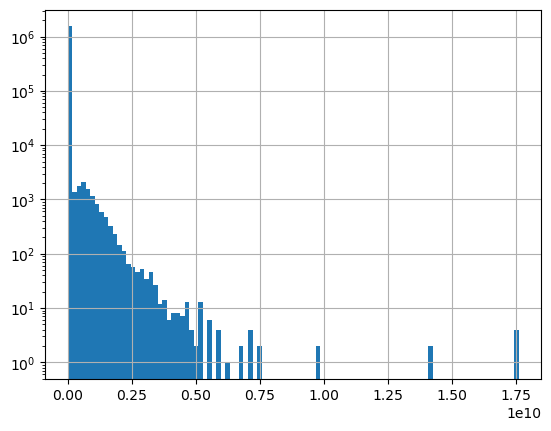

In [41]:
df['CONTRACT_MARKET_VALUE'].hist(bins=100, log=True)

### CONTRACT_MATURITY_DATE

In [42]:
df['CONTRACT_MATURITY_DATE']=df['CONTRACT_MATURITY_DATE']-startday

### CONTRACT_MORTGAGE_LENDING_VALUE

<Axes: >

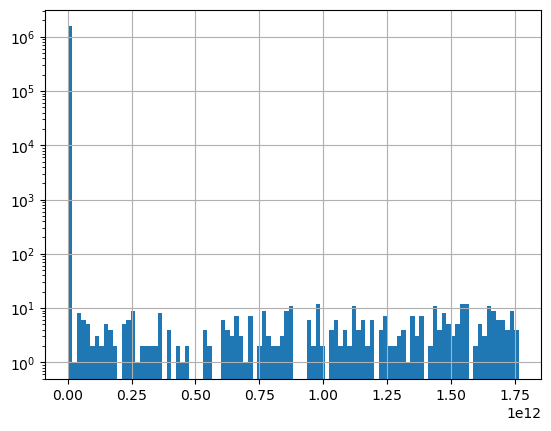

In [43]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].hist(bins=100, log=True)

In [44]:
len(df)

1558442

### CONTRACT_MORTGAGE_TYPE

In [45]:
df=dummy_creator(df,'CONTRACT_MORTGAGE_TYPE')
df=df.drop('CONTRACT_MORTGAGE_TYPE', axis=1)

### CONTRACT_REFINANCED

In [46]:
df=dummy_creator(df,'CONTRACT_REFINANCED')
df=df.drop('CONTRACT_REFINANCED', axis=1)

### CONTRACT_RISK_WEIGHTED_ASSETS

<Axes: >

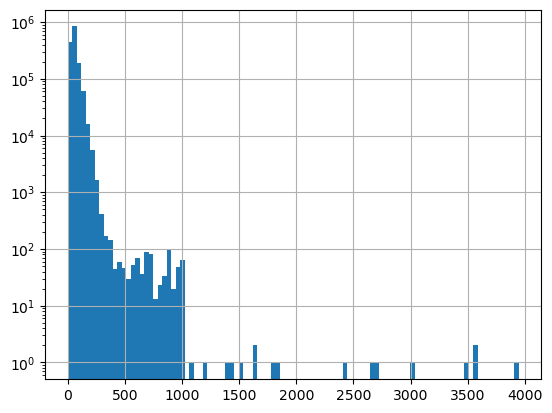

In [47]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].hist(bins=100, log=True)

### CONTRACT_TYPE_OF_INTEREST_REPAYMENT

In [48]:
df=dummy_creator(df,'CONTRACT_TYPE_OF_INTEREST_REPAYMENT')
df=df.drop('CONTRACT_TYPE_OF_INTEREST_REPAYMENT', axis=1)

### TARGET_EVENT_DAY

In [49]:
df['TARGET_EVENT_DAY']=df['TARGET_EVENT_DAY']-startday

### TARGET_EVENT

### Check ISNA

In [50]:
df.head(10)

,BORROWER_ID,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_LOAN_TO_VALUE_RATIO,CONTRACT_MARKET_VALUE,CONTRACT_MATURITY_DATE,...,CONTRACT_REFINANCED=_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT=_140003.0
0,d8SqtuEV,28,-1.0,9545.0,22.08,175424.0,192161,-1.0,-1.0,774,...,False,False,False,False,False,False,False,False,False,False
1,gII7nnq4,19,127305.0,8899.0,22.35,282553.0,275924,-1.0,-1.0,1506,...,False,False,False,False,True,False,False,False,False,False
2,MMkJ8z/e,14,-1.0,14329.0,0.00,68981.0,138862,-1.0,-1.0,321,...,False,False,False,False,False,False,False,False,False,False
3,M417onFP,67,-1.0,4003.0,23.92,163319.0,169624,-1.0,-1.0,2624,...,False,False,False,True,False,False,False,False,False,False
4,u9GRAuen,69,-1.0,11214.0,35.12,74244.0,100079,-1.0,-1.0,369,...,False,False,False,False,False,False,False,False,False,False
5,L2Nu2zZe,22,-1.0,11405.0,16.28,118161.0,140975,-1.0,-1.0,538,...,False,False,False,False,False,False,False,False,False,False
6,5A0GWOi2,25,-1.0,6045.0,16.27,42047.0,60963,-1.0,-1.0,417,...,False,False,False,False,False,False,False,False,False,False
7,lqPGd2+x,57,-1.0,10431.0,21.66,170739.0,190782,-1.0,-1.0,790,...,False,True,False,False,False,False,False,False,False,False
8,O7soZ57f,60,-1.0,14638.0,37.40,130944.0,130827,-1.0,-1.0,483,...,False,False,False,False,False,False,False,False,False,False
9,CnYRm/vc,76,109235.0,11677.0,25.06,271190.0,307046,-1.0,-1.0,1173,...,False,False,True,False,False,False,False,False,False,False


In [51]:
df=df.drop_duplicates()

print(df.shape)
df.to_csv('df_prep.csv', index=False)

(1558442, 459)


In [52]:
len(df)

1558442